##### Exercici 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
airdf=pd.read_csv('airdf.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
airdf=airdf.drop(['Unnamed: 0'], axis=1)
airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928371 entries, 0 to 1928370
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayOfWeek          int64  
 2   DepTime            float64
 3   ArrTime            float64
 4   UniqueCarrier      object 
 5   ActualElapsedTime  float64
 6   AirTime            float64
 7   ArrDelay           float64
 8   DepDelay           float64
 9   Origin             object 
 10  Dest               object 
 11  Distance           int64  
 12  CarrierDelay       float64
 13  WeatherDelay       float64
 14  NASDelay           float64
 15  SecurityDelay      float64
 16  LateAircraftDelay  float64
 17  status             object 
dtypes: float64(11), int64(3), object(4)
memory usage: 264.8+ MB


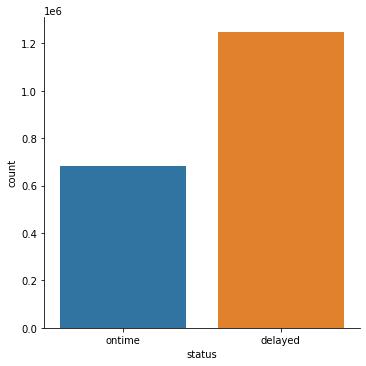

In [3]:
sns.catplot(x="status", kind="count", data=airdf)

##### Amb el Heatmap de correlacions es destaquen atributs molt relacionats

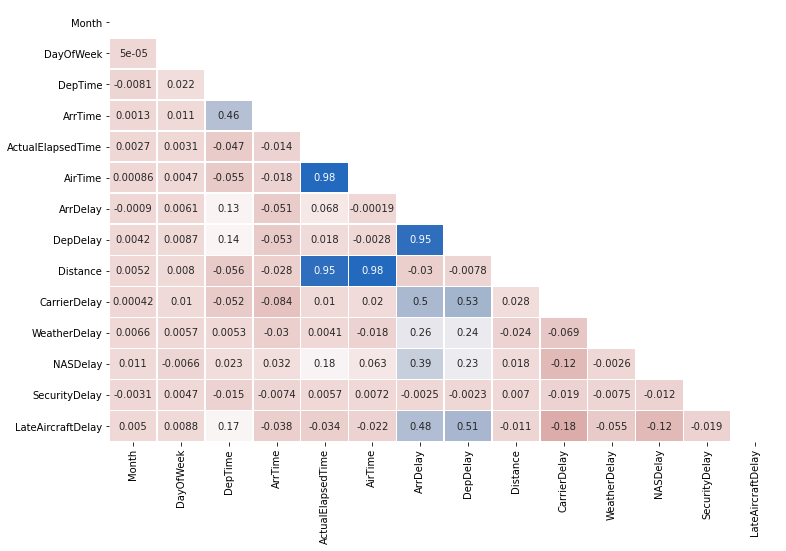

In [4]:
corr = airdf.corr()
cmap = sns.light_palette("#0c2a70", as_cmap=True)
mask = np.triu(corr)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='vlag_r', annot=True, linewidths=0.5, center=0.15, cbar=False, xticklabels=True,
           mask=mask)

In [5]:
#Correlation with output variable
cor_target = abs(corr["Distance"])#Selecting highly correlated features
print(cor_target[cor_target>0.5])


ActualElapsedTime    0.952980
AirTime              0.980294
Distance             1.000000
Name: Distance, dtype: float64


In [6]:
#per buscar columnes amb alta correlació que poden ser redundants. vistes també al heatmap
correlated_features = set()
correlation_matrix = airdf.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'AirTime', 'Distance', 'DepDelay'}


##### Eliminem les columnes que tenen una gran correlació amb altres

In [7]:
airdf=airdf.drop(['Distance'], axis=1)
airdf=airdf.drop(['AirTime'], axis=1)
airdf=airdf.drop(['ArrDelay'], axis=1)

In [8]:
airdf.isnull().sum()

Month                     0
DayOfWeek                 0
DepTime                   0
ArrTime                   0
UniqueCarrier             0
ActualElapsedTime         0
DepDelay                  0
Origin                    0
Dest                      0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
status                    0
dtype: int64

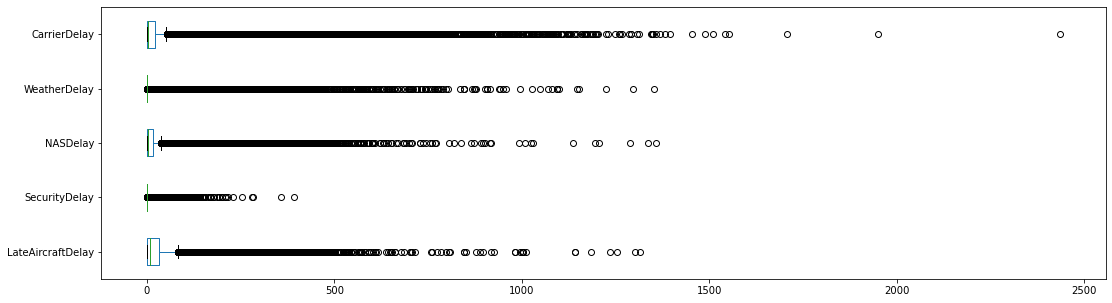

In [9]:
airdf[['LateAircraftDelay','SecurityDelay','NASDelay',
       'WeatherDelay','CarrierDelay']].plot(kind='box',figsize=(18,5),vert=False)

In [10]:
airdf.head()

,Month,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,DepDelay,Origin,Dest,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,status
0,1,4,2003.0,2211.0,WN,128.0,8.0,IAD,TPA,NaN,NaN,NaN,NaN,NaN,ontime
1,1,4,754.0,1002.0,WN,128.0,19.0,IAD,TPA,NaN,NaN,NaN,NaN,NaN,ontime
2,1,4,628.0,804.0,WN,96.0,8.0,IND,BWI,NaN,NaN,NaN,NaN,NaN,ontime
3,1,4,1829.0,1959.0,WN,90.0,34.0,IND,BWI,2.0,0.0,0.0,0.0,32.0,delayed
4,1,4,1940.0,2121.0,WN,101.0,25.0,IND,JAX,NaN,NaN,NaN,NaN,NaN,ontime


#change day of the week
def dow(x):
    if x == 1:
        return "monday"
    elif x == 2:
        return "tuesday"
    elif x == 3:
        return "wednesday"
    elif x == 4:
        return "thursday"
    elif x == 5:
        return "friday"
    elif x == 6:
        return "saturday"
    else:
        return "sunday"

airdf["DayOfWeek"] = airdf["DayOfWeek"].apply(dow)

#change month
def month(y):
    if y == 1:
        return "january"
    elif y == 2:
        return "february"
    elif y == 3:
        return "march"
    elif y == 4:
        return "april"
    elif y == 5:
        return "may"
    elif y == 6:
        return "june"
    elif y == 7:
        return "july"
    elif y == 8:
        return "august"
    elif y == 9:
        return "september"
    elif y == 10:
        return "october"
    elif y == 11:
        return "november"
    else:
        return "december"

airdf["Month"] = airdf["Month"].apply(month)

##### Simplificarem les hores d'arribada i sortida a franges horàries

In [11]:
def time(z):
    if z >= 1800:
        return "evening"
    elif z >= 1200:
        return "afternoon"
    elif z >= 600:
        return "morning"
    else:
        return "night"
    
airdf["DepTime"] = airdf["DepTime"].apply(time)
airdf["ArrTime"] = airdf["ArrTime"].apply(time)

# la correlació entre les colmnes és de 0.5727348206000767 després del canvi.

In [12]:
airdf["DepTime"].value_counts()

afternoon    819854
evening      633926
morning      453968
night         20623
Name: DepTime, dtype: int64

##### Per eliminar outliers convertirem les columnes de les causes del retràs a valors booleans, en aquest cas 0 i 1

In [13]:
def delay(k):
    if k >= 15:
        return int('1')
    else:
        return int('0')

airdf["CarrierDelay"] = airdf["CarrierDelay"].apply(delay)
airdf["WeatherDelay"] = airdf["WeatherDelay"].apply(delay)
airdf["NASDelay"] = airdf["NASDelay"].apply(delay)
airdf["SecurityDelay"] = airdf["SecurityDelay"].apply(delay)
airdf["LateAircraftDelay"] = airdf["LateAircraftDelay"].apply(delay)


In [14]:
airdf.rename(columns = {'LateAircraftDelay':'AircraftDelay','DepTime':'depart','ArrTime':'arrival',
                       'UniqueCarrier':'carrier','ActualElapsedTime':'elapsed_time'}, inplace = True)

##### Frequency Encoding columna Month, dia setmana i aerolínees

In [15]:
fe=airdf.groupby('Month').size()/len(airdf)
airdf.loc[:,'month_freq']=airdf['Month'].map(fe)

fe1=airdf.groupby('DayOfWeek').size()/len(airdf)
airdf.loc[:,'dia_freq']=airdf['DayOfWeek'].map(fe1)

fe2=airdf.groupby('carrier').size()/len(airdf)
airdf.loc[:,'carrier_freq']=airdf['carrier'].map(fe2)


In [16]:
#nova columna booleana per poder aplicar el mean encoding
airdf.loc[airdf['status'] == 'ontime', 'status_b'] = 0
airdf.loc[airdf['status'] == 'delayed', 'status_b'] = 1

In [17]:
mean_encode=airdf.groupby('Origin')['status_b'].mean()
airdf.loc[:,'origin_me']=airdf['Origin'].map(mean_encode)

mean_encode=airdf.groupby('Dest')['status_b'].mean()
airdf.loc[:,'dest_me']=airdf['Dest'].map(mean_encode)

In [18]:
airdf.head()

,Month,DayOfWeek,depart,arrival,carrier,elapsed_time,DepDelay,Origin,Dest,CarrierDelay,...,NASDelay,SecurityDelay,AircraftDelay,status,month_freq,dia_freq,carrier_freq,status_b,origin_me,dest_me
0,1,4,evening,evening,WN,128.0,8.0,IAD,TPA,0,...,0,0,0,ontime,0.094855,0.149527,0.195087,0.0,0.705808,0.595484
1,1,4,morning,morning,WN,128.0,19.0,IAD,TPA,0,...,0,0,0,ontime,0.094855,0.149527,0.195087,0.0,0.705808,0.595484
2,1,4,morning,morning,WN,96.0,8.0,IND,BWI,0,...,0,0,0,ontime,0.094855,0.149527,0.195087,0.0,0.668838,0.579580
3,1,4,evening,evening,WN,90.0,34.0,IND,BWI,0,...,0,0,1,delayed,0.094855,0.149527,0.195087,1.0,0.668838,0.579580
4,1,4,evening,evening,WN,101.0,25.0,IND,JAX,0,...,0,0,0,ontime,0.094855,0.149527,0.195087,0.0,0.668838,0.643672


In [19]:
#eliminem un outlier
airdf = airdf[airdf['elapsed_time'] != airdf['elapsed_time'].max()]

##### Farem dummies de les columnes depart i arrival

In [20]:
airdf = pd.get_dummies(airdf, prefix='dep', prefix_sep='_', columns=['depart'])
airdf = pd.get_dummies(airdf, prefix='arr', prefix_sep='_', columns=['arrival'])

In [21]:
airdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928370 entries, 0 to 1928370
Data columns (total 27 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Month          int64  
 1   DayOfWeek      int64  
 2   carrier        object 
 3   elapsed_time   float64
 4   DepDelay       float64
 5   Origin         object 
 6   Dest           object 
 7   CarrierDelay   int64  
 8   WeatherDelay   int64  
 9   NASDelay       int64  
 10  SecurityDelay  int64  
 11  AircraftDelay  int64  
 12  status         object 
 13  month_freq     float64
 14  dia_freq       float64
 15  carrier_freq   float64
 16  status_b       float64
 17  origin_me      float64
 18  dest_me        float64
 19  dep_afternoon  uint8  
 20  dep_evening    uint8  
 21  dep_morning    uint8  
 22  dep_night      uint8  
 23  arr_afternoon  uint8  
 24  arr_evening    uint8  
 25  arr_morning    uint8  
 26  arr_night      uint8  
dtypes: float64(8), int64(7), object(4), uint8(8)
memory usage: 309.0+ MB


In [22]:
newdf=airdf.loc[:, ['month_freq', 'dia_freq', 'elapsed_time', 'DepDelay', 'origin_me', 'dest_me','carrier_freq',
                    'dep_afternoon', 'dep_evening', 'dep_morning', 'dep_night',
                    'arr_afternoon', 'arr_evening', 'arr_morning', 'arr_night','CarrierDelay', 'WeatherDelay',
                    'NASDelay', 'SecurityDelay','AircraftDelay', 'status']]
newdf.head(3)

,month_freq,dia_freq,elapsed_time,DepDelay,origin_me,dest_me,carrier_freq,dep_afternoon,dep_evening,dep_morning,...,arr_afternoon,arr_evening,arr_morning,arr_night,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,AircraftDelay,status
0,0.094855,0.149527,128.0,8.0,0.705808,0.595484,0.195087,0,1,0,...,0,1,0,0,0,0,0,0,0,ontime
1,0.094855,0.149527,128.0,19.0,0.705808,0.595484,0.195087,0,0,1,...,0,0,1,0,0,0,0,0,0,ontime
2,0.094855,0.149527,96.0,8.0,0.668838,0.579580,0.195087,0,0,1,...,0,0,1,0,0,0,0,0,0,ontime


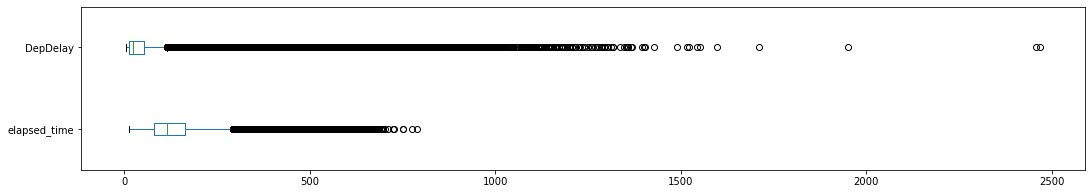

In [23]:
newdf[['elapsed_time','DepDelay']].plot(kind='box',figsize=(18,3),vert=False)

In [24]:
#Farem servir RobustScaler i QuantileTransformer per reduir la  dels ouliers
from sklearn.preprocessing import QuantileTransformer, RobustScaler


scaler = QuantileTransformer()
scaler1 = RobustScaler()

newdf[['DepDelay']] = scaler.fit_transform(newdf[['DepDelay']])
newdf[['elapsed_time']] = scaler1.fit_transform(newdf[['elapsed_time']])

##### Excercici 3. Nova base de dades, <i>newdf</i> 

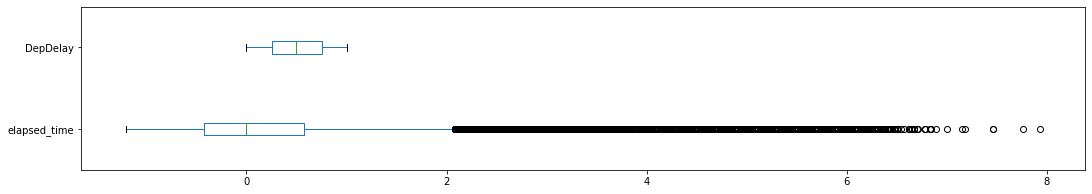

In [25]:
#resultat gràfic que mostra el resultat de gestionar els atributs amb molts outliers
newdf[['elapsed_time','DepDelay']].plot(kind='box',figsize=(18,3),vert=False)

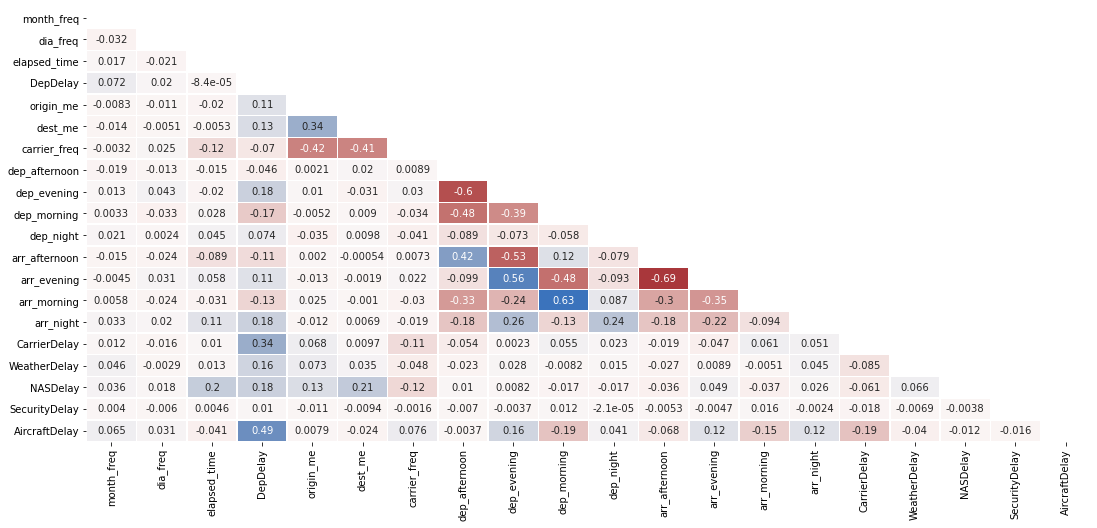

In [26]:
# Heatmap amb les correlacions, algunes altes (tant positives-blau- com negatives -vermell-)
# però no suficient per eliminar un atribut
corr = newdf.corr()
cmap = sns.light_palette("#0c2a70", as_cmap=True)
mask = np.triu(corr)
plt.figure(figsize=(18,8))
sns.heatmap(corr, cmap='vlag_r', annot=True, linewidths=0.5, center=0, cbar=False, xticklabels=True,
           mask=mask)

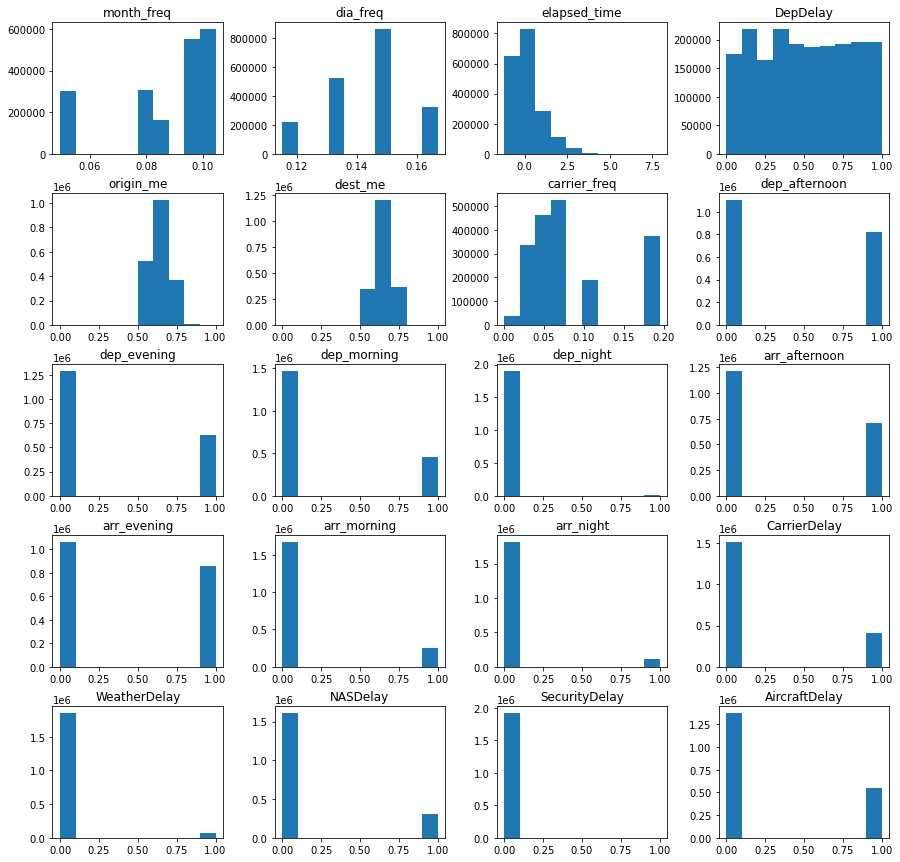

In [27]:
hist = newdf.hist(figsize = (15,15),grid=False)

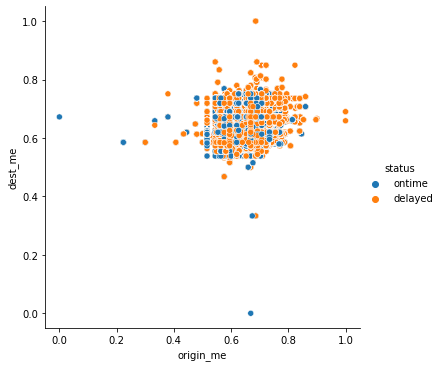

In [28]:
#una prova per veure la relació entre origen, destí i possible retràs
sns.relplot(x="origin_me", y="dest_me", data=newdf, hue='status');

In [29]:
print(newdf.describe( include = 'all'))

          month_freq      dia_freq  elapsed_time      DepDelay     origin_me  \
count   1.928370e+06  1.928370e+06  1.928370e+06  1.928370e+06  1.928370e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    8.797334e-02  1.444464e-01  2.035924e-01  5.004791e-01  6.469129e-01   
std     1.755125e-02  1.474205e-02  8.477250e-01  2.908251e-01  5.860225e-02   
min     4.944640e-02  1.152273e-01 -1.200000e+00  0.000000e+00  0.000000e+00   
25%     8.026619e-02  1.356056e-01 -4.235294e-01  2.502503e-01  5.862721e-01   
50%     9.485467e-02  1.477620e-01  0.000000e+00  4.974975e-01  6.574930e-01   
75%     1.036564e-01  1.502937e-01  5.764706e-01  7.512513e-01  6.900424e-01   
max     1.044965e-01  1.669710e-01  7.929412e+00  1.000000e+00  1.000000e+00   

             dest_me  carrier_freq  dep

##### múltiple plot dels atributs no binaris (0 o 1)

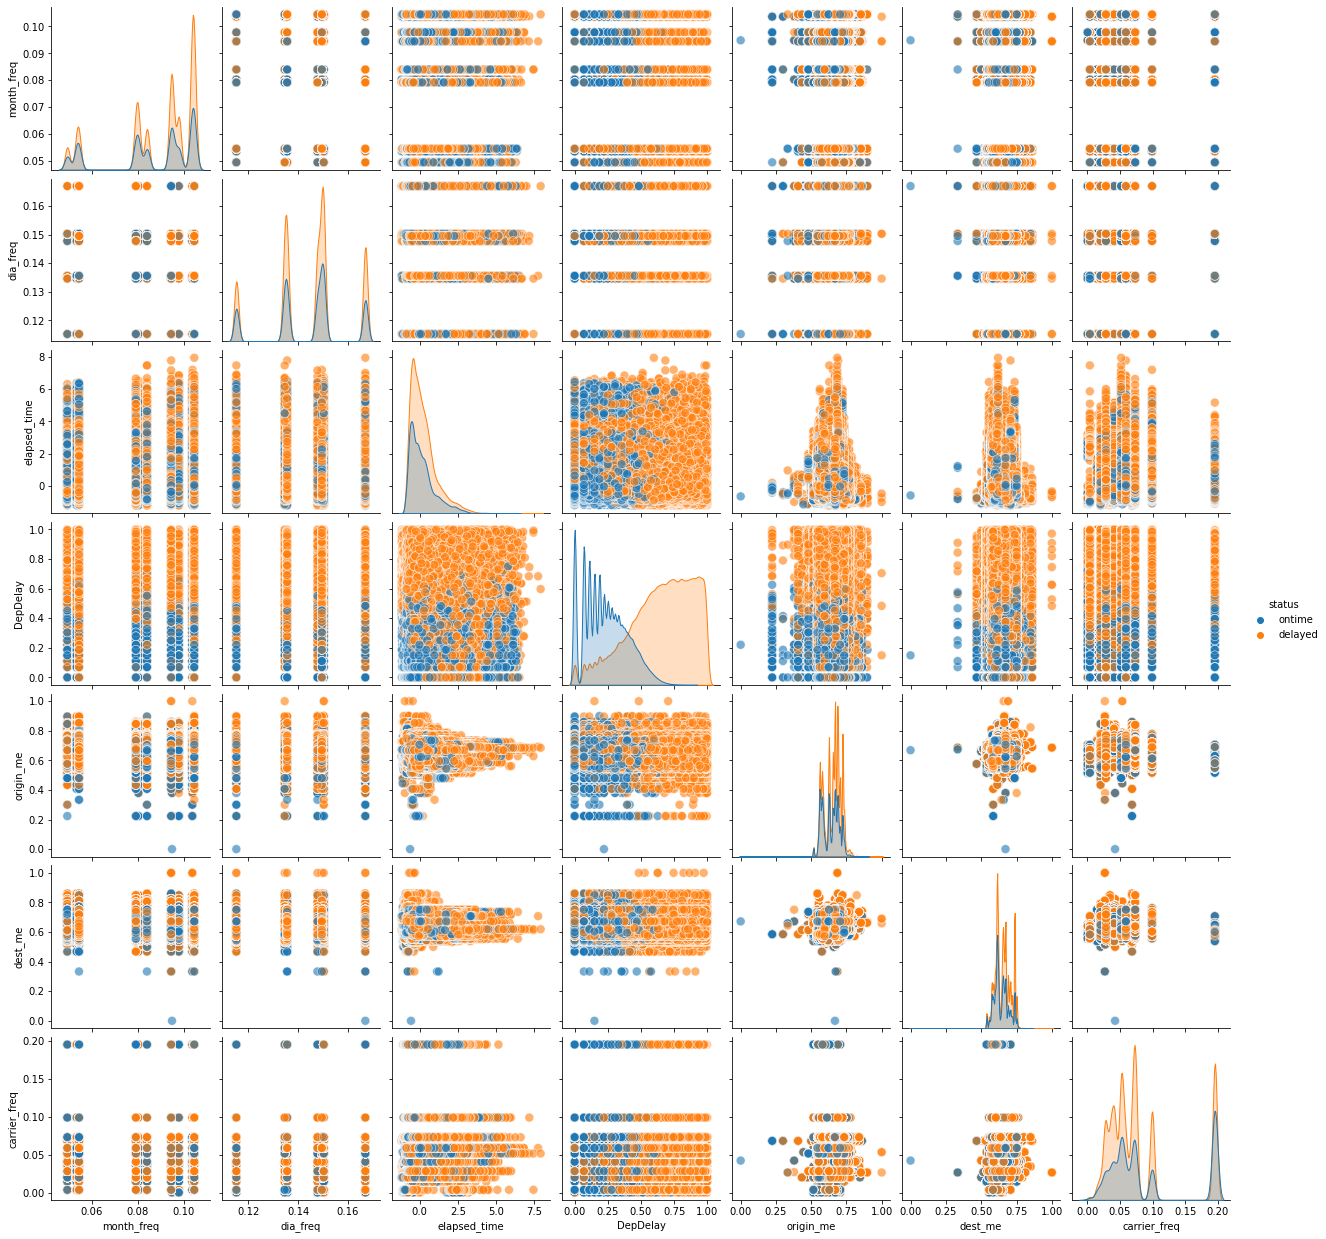

In [31]:
plotdf=newdf[['month_freq','dia_freq','elapsed_time','DepDelay','origin_me','dest_me','carrier_freq','status']]
sns.pairplot(plotdf, hue = 'status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'w'})